<a href="https://colab.research.google.com/github/anand-therattil/Sonar-Rock-Mine-Prediction/blob/Plotting-Data-using-PCA-and-T-SNE/Rock_vs_Sonar_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Modules

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn

### Data Loading & Preprocessing

In [2]:
# To be used for the drive connection
drive.mount(r'/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv(r'drive/MyDrive/Colab Notebooks/Dataset/sonar.all-data.csv',header=None)
data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [4]:
independent = data.drop(columns=60,axis=1)
dependent = data[60]

## PLotting of Data Using T-SNE 

In [5]:
standardized_data = StandardScaler().fit_transform(independent)
print(standardized_data.shape)

(208, 60)


#### PCA Plotting 

In [6]:
model = PCA(n_components = 2)  
PCA_data = model.fit_transform(independent)

In [7]:
PCA_data = np.vstack((PCA_data.T, dependent)).T
PCA_df = pd.DataFrame(data = PCA_data,
     columns =("Dim_1", "Dim_2", "label"))

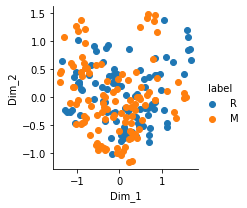

In [8]:
sn.FacetGrid(PCA_df, hue ="label").map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

#### TSNE Plotting

In [9]:
model = TSNE(n_components = 2, random_state = 0,learning_rate='auto',init='random')
tsne_data = model.fit_transform(independent)

In [10]:
tsne_data = np.vstack((tsne_data.T, dependent)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

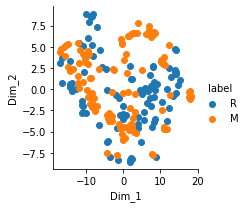

In [11]:
sn.FacetGrid(tsne_df, hue ="label").map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

## Data Splitting and Training Model 

In [12]:
x_train,x_test,y_train,y_test =train_test_split(independent,dependent,test_size=0.1,stratify=dependent,random_state=1)

In [13]:
model =LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
x_t_predict = model.predict(x_train)
training_acc = accuracy_score(x_t_predict,y_train)
print(training_acc*100)

83.42245989304813


In [15]:
x_t_predict = model.predict(x_test)
testing_acc = accuracy_score(x_t_predict,y_test)
print(testing_acc*100)

76.19047619047619


In [16]:
input_data = (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
input_data = np.asarray(input_data)
input_data = input_data.reshape([1,-1])
predict = model.predict(input_data)
if(predict[0]=="R"):
    print("The object is Rock !")
else:
    print("The object is Mine !")

The object is Rock !
